In [ ]:
import pandas as pd
import numpy as np
import logging
import time

In [ ]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s',filename='app.log')


In [ ]:
from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext
from tfx.orchestration import metadata

connection_config = metadata.mysql_metadata_connection_config(
    host='localhost',
    port=3306,
    database='meta_data',
    username='root',
    password='harsh'
)

context = InteractiveContext(metadata_connection_config=connection_config)

In [ ]:
logging.info("Loading data")

In [ ]:
df=pd.read_csv("./complaints.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_25036\183382735.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./complaints.csv")


In [ ]:
if df.empty:
    logging.error("No data found")
    exit(1)
else:
    logging.info("Data loaded")

In [ ]:
logging.info("Data Preprocessing Phase - 1")
logging.info("Encoding the categorical data to numerical data with Label Encoding")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Encode the categorical data
columns_to_encode = ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company public response', 'State', 'ZIP code', 'Consumer consent provided?', 'Submitted via', 'Company response to consumer', 'Timely response?','Date received','Date sent to company','Company','Complaint ID']

df[columns_to_encode] = df[columns_to_encode].apply(lambda col: le.fit_transform(col))

In [ ]:
# Assuming df is your DataFrame
data_types = df[columns_to_encode].dtypes

for i in data_types:
    if(i != 'int32'):
        print(i)
        logging.error("Encoding failed")
        exit(1)
    else:
        logging.info("Encoding successful")

int64


In [ ]:
df.dtypes

Date received                    int32
Product                          int32
Sub-product                      int32
Issue                            int32
Sub-issue                        int32
Consumer complaint narrative    object
Company public response          int32
Company                          int32
State                            int32
ZIP code                         int32
Tags                            object
Consumer consent provided?       int32
Submitted via                    int32
Date sent to company             int32
Company response to consumer     int32
Timely response?                 int32
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [ ]:
logging.info("Coorelation Analysis w/r to Target Variable")

In [ ]:
correlation = df.corr()
values = correlation['Consumer disputed?'].sort_values(ascending=False)
logging.info(values)

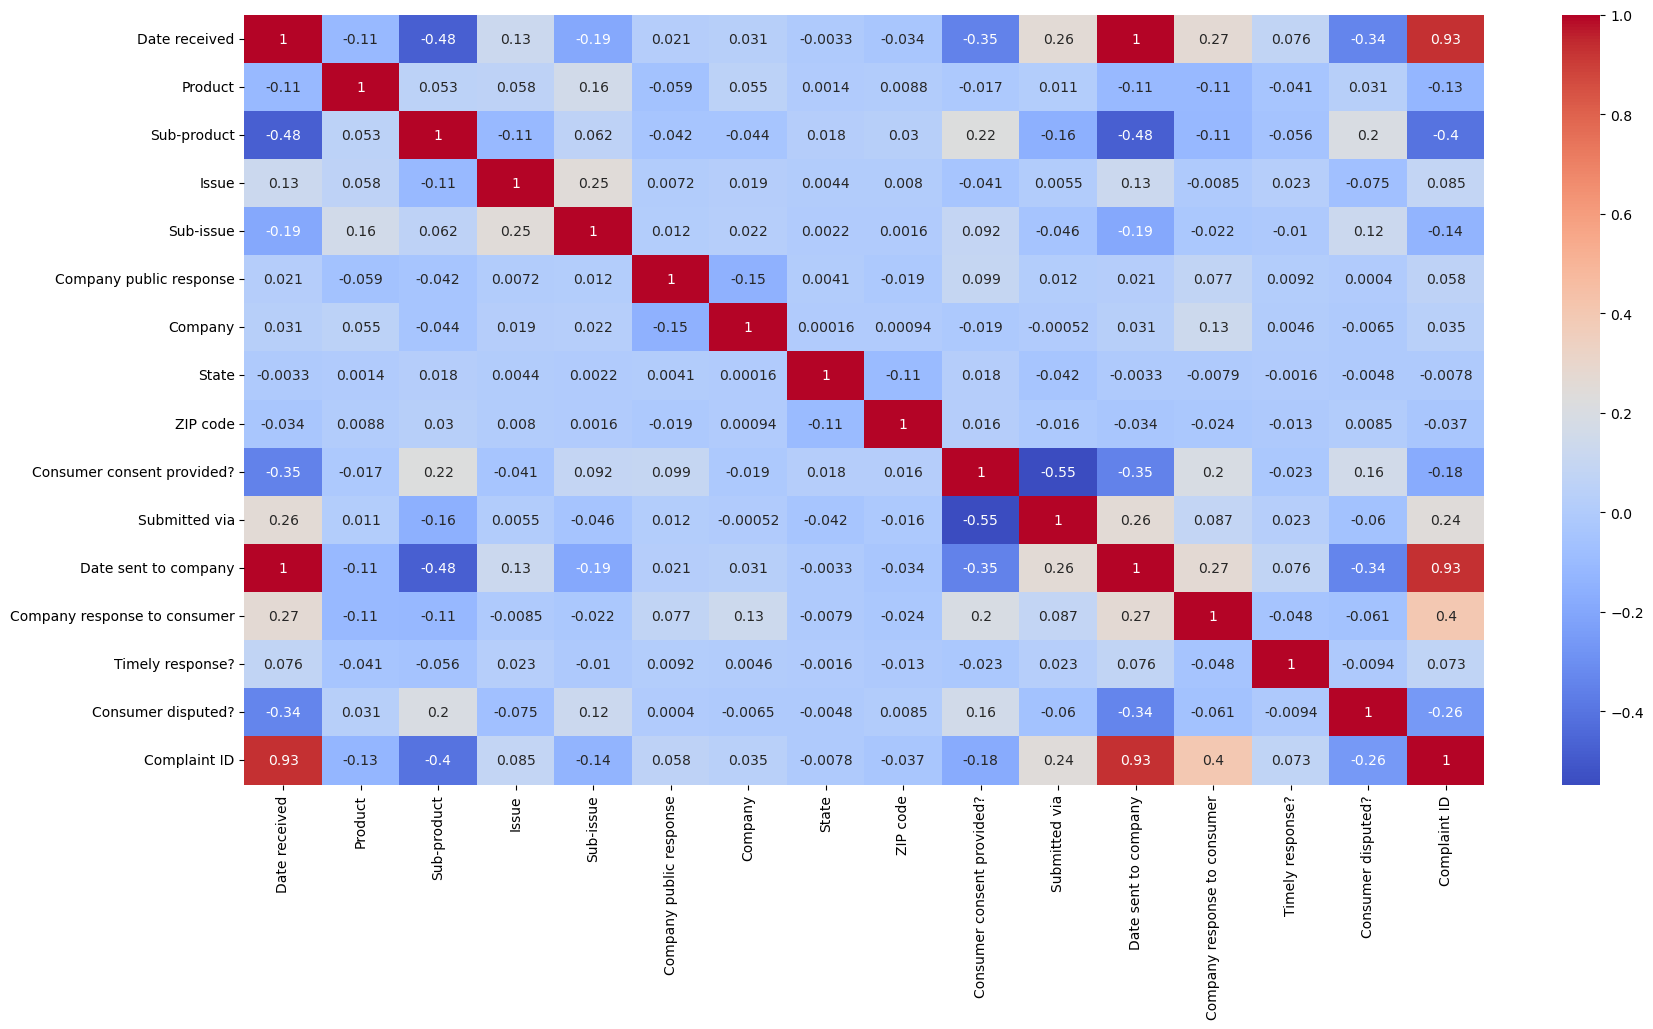

In [ ]:
#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
logging.info("Data Preprocessing Phase - 2 : Handling missing values and mapping the boolean data")

In [ ]:
df['Consumer disputed?'] = df['Consumer disputed?'].map({'Yes': 1, 'No': 0})

In [ ]:
logging.info("Mapping for boolean data successful")
logging.info(df['Consumer disputed?'].value_counts())

In [ ]:
null_values = df.isnull()
logging.info(null_values)

In [ ]:
logging.info("Handling missing values")

In [ ]:
df.dropna(subset=['Company public response'], inplace=True)

In [ ]:
df.drop(columns=['Tags','Consumer complaint narrative'], inplace=True)

In [ ]:
if 'Tags' in df.columns or 'Consumer complaint narrative' in df.columns:
    logging.error("Columns still exist.")
else:
    logging.info("Columns have been successfully dropped.")

In [ ]:
df['Consumer disputed?'].unique()

array([nan,  0.,  1.])

In [ ]:
df['Consumer disputed?'].value_counts()

0.0    619938
1.0    148378
Name: Consumer disputed?, dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)

df = pd.DataFrame(imp.fit_transform(df), columns = df.columns)

df

,Date received,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,4386.0,6.0,15.0,78.0,213.0,10.0,2426.0,53.0,25475.0,1.0,5.0,4335.0,1.0,1.0,-0.016874,4400145.0
1,4468.0,6.0,15.0,75.0,226.0,10.0,6383.0,41.0,29475.0,0.0,5.0,4417.0,3.0,1.0,-0.073043,4785735.0
2,4468.0,6.0,15.0,75.0,70.0,10.0,6383.0,24.0,23745.0,0.0,5.0,4417.0,3.0,1.0,-0.107750,4785736.0
3,4468.0,3.0,26.0,32.0,26.0,11.0,1125.0,40.0,29249.0,4.0,5.0,4417.0,1.0,1.0,-0.095903,4781994.0
4,4468.0,6.0,15.0,75.0,70.0,11.0,2251.0,39.0,2725.0,4.0,5.0,4417.0,1.0,1.0,-0.097305,4789565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980440,4260.0,7.0,15.0,78.0,124.0,11.0,2251.0,53.0,25843.0,3.0,5.0,4209.0,3.0,1.0,-0.099140,3924882.0
4980441,4260.0,15.0,36.0,126.0,272.0,11.0,4527.0,39.0,2664.0,4.0,2.0,4209.0,1.0,1.0,-0.087376,3928821.0
4980442,4260.0,12.0,20.0,149.0,272.0,4.0,1517.0,53.0,26385.0,3.0,5.0,4224.0,1.0,1.0,-0.017171,3927000.0
4980443,4260.0,7.0,15.0,75.0,226.0,11.0,2251.0,15.0,10388.0,0.0,5.0,4209.0,1.0,1.0,0.010785,3927348.0


In [ ]:
df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

In [ ]:
null_values_check = df.isnull().sum()
if(null_values_check.any()):
    logging.error("Null values still exist")
    exit(1)
else:
    logging.info("Null values handled successfully")

In [ ]:
df['Consumer disputed?'].unique()

array([-0.01687367, -0.07304311, -0.10774995, ..., -0.01717062,
        0.01078493,  0.02340724])

In [ ]:
df['Consumer disputed?'].value_counts()

 0.000000    619938
 1.000000    148378
-0.016874         1
 0.161849         1
-0.034753         1
              ...  
 0.049087         1
-0.007488         1
-0.018182         1
-0.090253         1
 0.023407         1
Name: Consumer disputed?, Length: 4212131, dtype: int64

In [ ]:
df['Consumer disputed?'] = np.where(df['Consumer disputed?']<0.5, 0, 1)

In [ ]:
df['Consumer disputed?'].value_counts()

0    4832067
1     148378
Name: Consumer disputed?, dtype: int64

In [ ]:
df['Consumer disputed?'] = df['Consumer disputed?'].map({1: 'Yes', 0: 'No'})

In [ ]:
df['Consumer disputed?'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Replace yes and no with 1 and 0
df['Consumer disputed?'] = df['Consumer disputed?'].map({'Yes': 1, 'No': 0})

In [ ]:
balance_data = df['Consumer disputed?'].value_counts()
logging.info(balance_data)

In [ ]:
logging.info("Data Preprocessing Phase - 3 : Synthetic data sampling")

In [ ]:
from imblearn.over_sampling import SMOTE

X = df[['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company public response', 'State', 'ZIP code', 'Consumer consent provided?', 'Submitted via', 'Company response to consumer', 'Timely response?','Company']]


y  = df['Consumer disputed?']

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    4832067
1    4832067
Name: Consumer disputed?, dtype: int64

In [ ]:
resampled_data = y_sm.value_counts()
logging.info(resampled_data)

In [ ]:
logging.info("Data Preprocessing Phase - 4 : Train Test Split")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)

In [ ]:
!nvidia-smi

Tue May 14 13:17:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.01                 Driver Version: 546.01       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   62C    P8               7W /  60W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
X_train

,Product,Sub-product,Issue,Sub-issue,Company public response,State,ZIP code,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Company
8996762,3.00000,86.00000,144.956516,272.00000,10.926422,29.0,17538.250829,3.779266,2.220734,1.000000,1.0,806.0
1924531,6.00000,15.00000,121.000000,95.00000,10.000000,15.0,10380.000000,1.000000,5.000000,1.000000,1.0,2426.0
5873354,12.00000,56.00000,88.000000,272.00000,10.000000,7.0,28777.000000,4.000000,4.000000,1.000000,1.0,6929.0
6994184,8.66382,8.44397,30.601384,272.00000,11.000000,19.0,28267.896481,4.000000,4.165955,1.000000,1.0,806.0
7482400,12.00000,32.00000,88.696932,272.00000,11.000000,26.0,7191.696932,4.000000,4.651534,1.000000,1.0,6929.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8222403,8.00000,11.00000,39.000000,78.43957,9.120859,52.0,13764.527302,2.318711,3.681289,1.560430,1.0,1211.0
5157699,3.00000,86.00000,42.748639,272.00000,11.000000,42.0,3605.181323,4.000000,3.409338,1.818677,1.0,179.0
2215104,18.00000,23.00000,78.000000,0.00000,11.000000,8.0,31030.000000,0.000000,5.000000,1.000000,1.0,4682.0
1484405,6.00000,15.00000,121.000000,204.00000,11.000000,3.0,13222.000000,1.000000,5.000000,3.000000,1.0,2251.0


In [ ]:
y_train

8996762    1
1924531    0
5873354    1
6994184    1
7482400    1
          ..
8222403    1
5157699    1
2215104    0
1484405    0
8325804    1
Name: Consumer disputed?, Length: 7731307, dtype: int64

In [ ]:
logging.info("Completed Data Preprocessing")

In [ ]:
logging.info("Pytorch Model Training Phase")

In [ ]:
import torch

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [ ]:

# Time
#TFX

In [ ]:
import logging
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Configure logging

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device == 'cpu':
    logging.warning('CUDA is not available. Training will be performed on CPU.')


X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)


train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# DataLoader
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False)  # No need to shuffle test data

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(12,128)  # Changed input size to 2
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Model().to(device)  # Move model to device

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 7
# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # Move data to device
        optimizer.zero_grad()
        output = model(X_batch.view(X_batch.size(0), -1))  # Use actual batch size
        loss = criterion(output, y_batch.view(-1, 1))
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # Move data to device
            output = model(X_batch.view(X_batch.size(0), -1))  # Use actual batch size
            test_loss += criterion(output, y_batch.view(-1, 1)).item()

    test_loss /= len(test_loader)

    if test_loss > 1.0:  # Change this condition as per your requirement
        logging.error(f'Epoch: {epoch} Test loss is too high: {test_loss}')
        print(f'Epoch: {epoch} Test loss is too high: {test_loss}')
    else:
        logging.info(f'Epoch: {epoch} Train Loss: {loss.item()} Test Loss: {test_loss}')
        print(f'Epoch: {epoch} Train Loss: {loss.item()} Test Loss: {test_loss}')

logging.info('Training completed.')
print('Training completed.')

Epoch: 0 Train Loss: 0.2815556526184082 Test Loss: 0.31899175702665056
Epoch: 1 Train Loss: 0.4657110273838043 Test Loss: 0.30355672356832786
Epoch: 2 Train Loss: 0.22617562115192413 Test Loss: 0.2887784884439265
Epoch: 3 Train Loss: 0.3292101323604584 Test Loss: 0.2724893550364739
Epoch: 4 Train Loss: 0.34516677260398865 Test Loss: 0.2694694028735508
Epoch: 5 Train Loss: 0.19127164781093597 Test Loss: 0.26840577388881615
Epoch: 6 Train Loss: 0.34800949692726135 Test Loss: 0.2740556140851234
Training completed.


In [ ]:
logging.info("Model Training Phase Completed")

In [ ]:
logging.info("Model Evaluation Phase")

In [ ]:
#Accuracy
correct = 0
total = 0
one_pred = 0
zero_pred = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # Move data to device
        start_time = time.time()
        output = model(X_batch.view(X_batch.size(0), -1))  # Use actual batch size
        predicted = torch.round(torch.sigmoid(output))
        end_time = time.time()
        logging.info(f'Inference time: {end_time - start_time} seconds')
        total += y_batch.size(0)
        correct += (predicted == y_batch.view(-1, 1)).sum().item()

print(f'Accuracy: {correct / total}')
logging.info(f'Accuracy: {correct / total}')

Accuracy: 0.8937250980041153


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert tensors to numpy arrays
y_true = y_batch.view(-1, 1).cpu().numpy()
y_pred = predicted.cpu().numpy()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

logging.info(f'Precision: {precision}')
logging.info(f'Recall: {recall}')
logging.info(f'F1 Score: {f1}')

Precision: 0.8461538461538461
Recall: 0.9166666666666666
F1 Score: 0.88


In [ ]:
logging.info("Model Evaluation Phase Completed")

In [ ]:
logging.info("Model Saving Phase")

In [ ]:
torch.save(model.state_dict(), 'model.pth')

In [ ]:
logging.info("Model Saved Successfully")